In [ ]:
## 시나리오 1 : LSTM을 활용하여 앞으로 12개월간의 매출 예측
# Import module
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving Monthly_zoho.csv to Monthly_zoho (1).csv


In [ ]:
#io와 pandas 모듈 import
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
revenue_origin = pd.read_csv(io.BytesIO(myfile['Monthly_zoho.csv']))
revenue_origin.head()


,Date,DealScore,LeadScore,ConvertedRate,DealNum,LeadNum,Net
0,2017-1,8.819828e+14,8.614197e+06,0.282051,11,28,4381965.61
1,2017-2,4.349704e+16,2.289988e+07,0.366667,11,19,3024402.13
2,2017-3,1.650798e+15,7.737407e+06,0.123967,15,106,4275189.62
3,2017-4,2.011081e+16,1.744081e+08,0.081897,19,213,2650943.38
4,2017-5,3.656080e+14,8.588870e+06,0.138211,17,106,1079905.66


In [ ]:
# Parsing the features
date = revenue_origin['Date'] 
revenue_origin['Date'] = pd.to_datetime(revenue_origin['Date'])

revenue_origin['year'] = pd.DatetimeIndex(revenue_origin['Date']).year
revenue_origin['month'] = pd.DatetimeIndex(revenue_origin['Date']).month

#features_considered = ['year','month','Net']
features_considered = ['DealScore','LeadScore','ConvertedRate','DealNum','LeadNum','Net']
# features_considered = ['IndustryNumeric',	'TerritoryNumeric',	'ConvertedRate',	'DealNum',	'LeadNum',	'Net']

print(len(revenue_origin))
revenue = revenue_origin[features_considered]

55


In [ ]:
from sklearn import preprocessing
# Min-Max Scaling
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(revenue) #값을 0~1로 떨어뜨린다
scaled = scaler.transform(revenue) #값을 0~1로 떨어뜨린다

rev = np.array(revenue)
# print(rev)
## Set window size (input, output)
# reshape input to be 3D [samples, timesteps, features]
reframed_X =[]
reframed_Y = []
predict_X = []
n_future = 12
n_past = 12

for i in range(n_past, len(scaled)-n_future+1):
    reframed_X.append(scaled[i-n_past:i, 0:scaled.shape[1]])
    reframed_Y.append(rev[i:i+n_future, -1])

predict_X = scaled[-13:-1, 0:scaled.shape[1]]
predict_X = np.array(predict_X)
print(predict_X.shape)
reframed_X, reframed_Y = np.array(reframed_X), np.array(reframed_Y)
#(32, 12, 6)
#(32, 12)
print(reframed_X.shape)
print(reframed_Y.shape)

(12, 6)
(32, 12, 6)
(32, 12)


In [ ]:
# # Split the Data
# n_train_len = round(len(reframed_X) * 0.8,0) -> 26
train_X = reframed_X[:26, :]
train_y = reframed_Y[:26, :]
test_X = reframed_X[26:, :]
test_y = reframed_Y[26:, :]

print(train_X.shape)
print(train_y.shape)

(26, 12, 6)
(26, 12)


In [ ]:
# multivariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# Many to Many 
# train the model
def build_model(train_x, train_y):
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(100, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(12, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mae', optimizer='adam')
	# fit network
	return model

print(train_y.shape)
# define parameters
verbose, epochs, batch_size = 1, 100, 3

model = build_model(train_X,train_y)
model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=2)

(26, 12)
Epoch 1/100
9/9 - 3s - loss: 5803104.0000
Epoch 2/100
9/9 - 1s - loss: 5803103.5000
Epoch 3/100
9/9 - 1s - loss: 5803048.5000
Epoch 4/100
9/9 - 1s - loss: 5760082.5000
Epoch 5/100
9/9 - 1s - loss: 5395482.5000
Epoch 6/100
9/9 - 1s - loss: 5320466.0000
Epoch 7/100
9/9 - 1s - loss: 5398018.0000
Epoch 8/100
9/9 - 1s - loss: 5384344.0000
Epoch 9/100
9/9 - 1s - loss: 5378395.0000
Epoch 10/100
9/9 - 1s - loss: 5222669.0000
Epoch 11/100
9/9 - 1s - loss: 5258949.0000
Epoch 12/100
9/9 - 1s - loss: 5079766.0000
Epoch 13/100
9/9 - 1s - loss: 5010217.5000
Epoch 14/100
9/9 - 1s - loss: 4966021.0000
Epoch 15/100
9/9 - 1s - loss: 4880764.5000
Epoch 16/100
9/9 - 1s - loss: 4645805.0000
Epoch 17/100
9/9 - 1s - loss: 4477196.5000
Epoch 18/100
9/9 - 1s - loss: 4052876.0000
Epoch 19/100
9/9 - 1s - loss: 4232835.5000
Epoch 20/100
9/9 - 1s - loss: 4405129.0000
Epoch 21/100
9/9 - 1s - loss: 3919338.5000
Epoch 22/100
9/9 - 1s - loss: 3404677.7500
Epoch 23/100
9/9 - 1s - loss: 3480359.0000
Epoch 24/10

1/1 [==============================] - 0s 444ms/step - loss: 1625894.6250
1625894.625


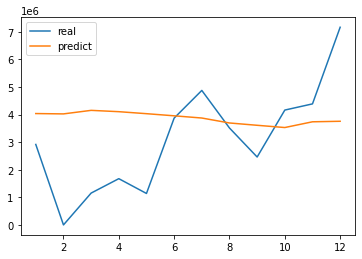

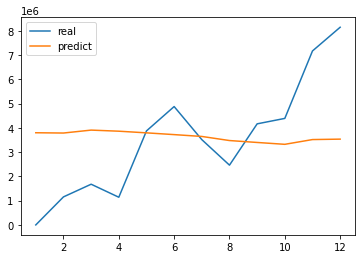

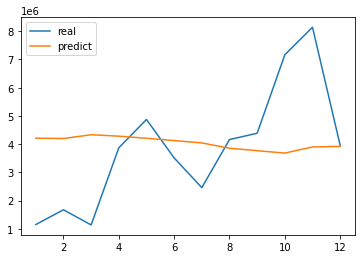

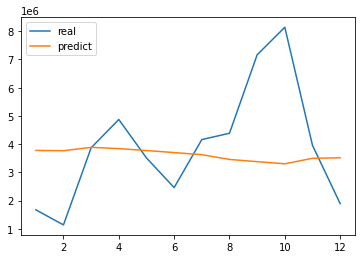

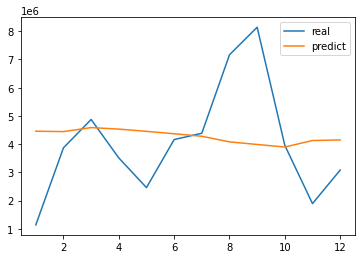

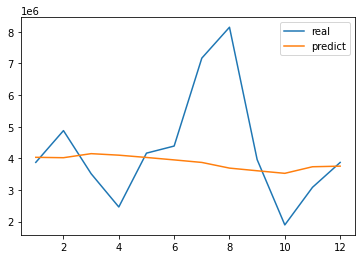

In [ ]:
import matplotlib.pyplot as plt
pred_y = model.predict(test_X,verbose=1)
score = model.evaluate(test_X, test_y,verbose=1)
print(score)
# loss: 0.0602 -> month,year 로 했을 때
# loss: 0.0817 -> 우리 feature
#loss: 0.0766
# loss: 0.0566
# loss: 0.0573
for i in range(0,6):
  pred1 = np.array(pred_y[i]).flatten()
  plt.plot(range(1,13),test_y[i],label='real')
  plt.plot(range(1,13),pred1,label='predict')
  plt.legend()
  plt.show()
# score = model.evaluate(test_X, test_y, batch_size=128)

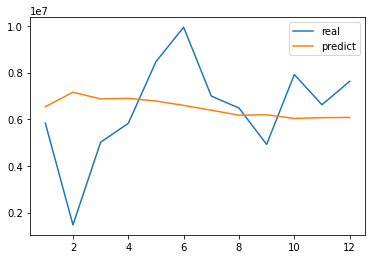

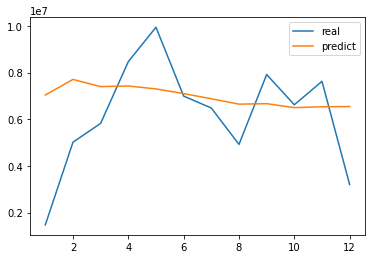

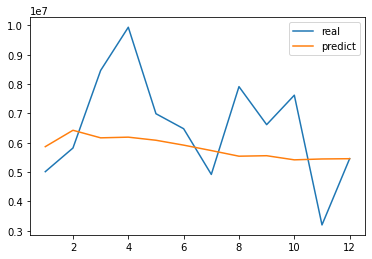

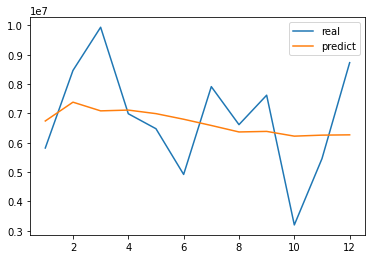

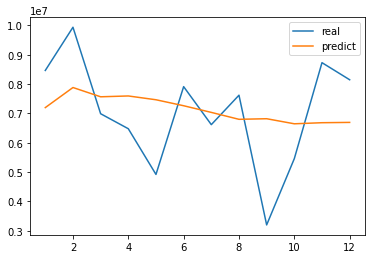

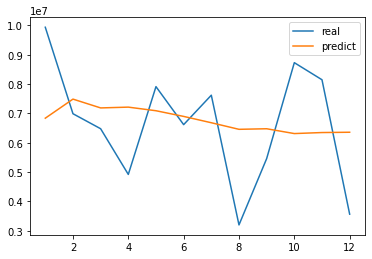

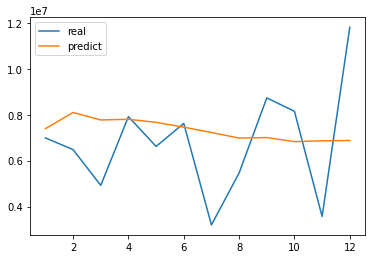

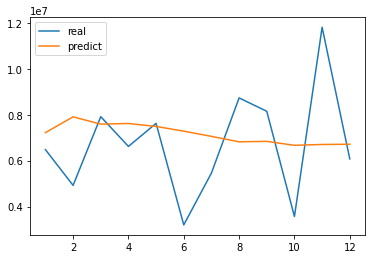

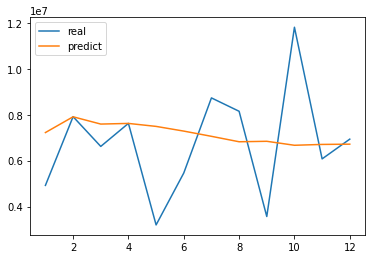

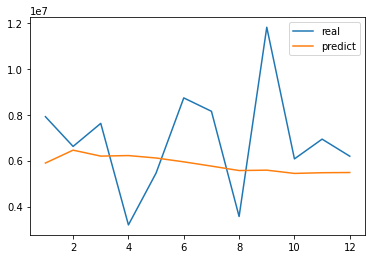

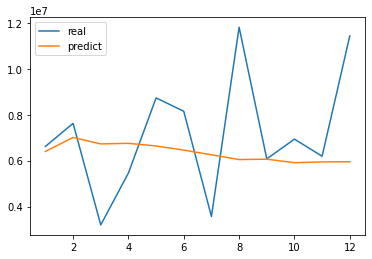

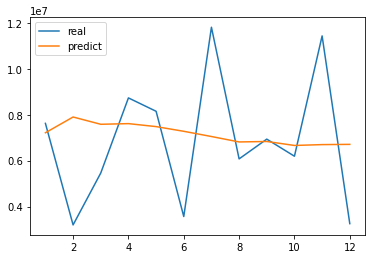

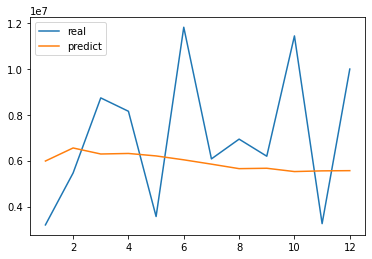

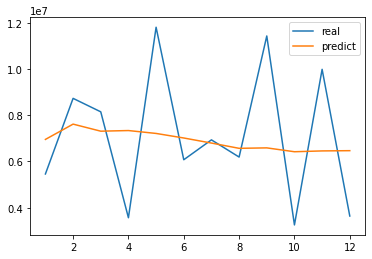

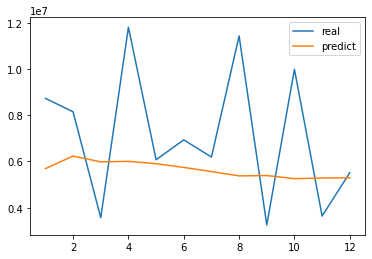

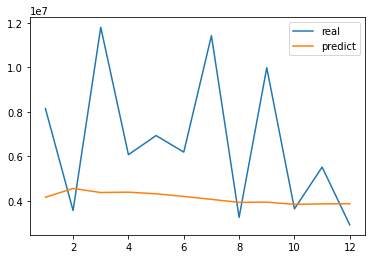

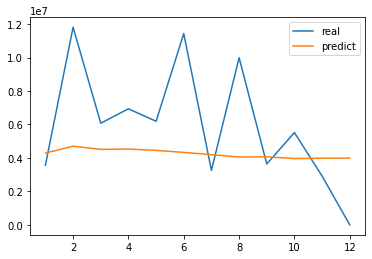

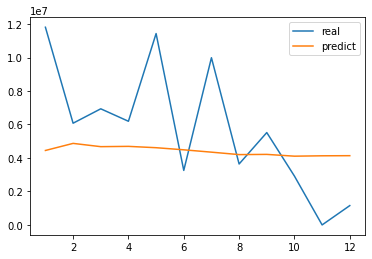

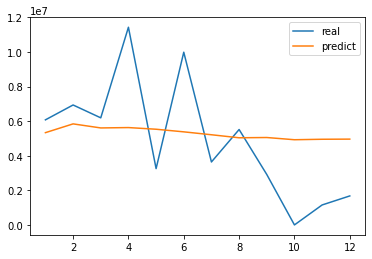

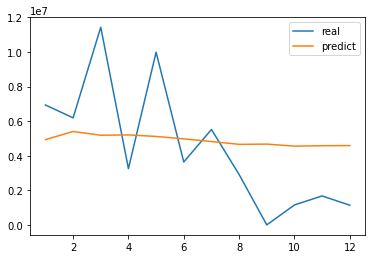

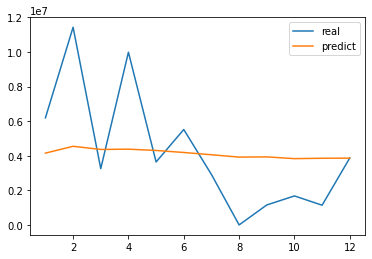

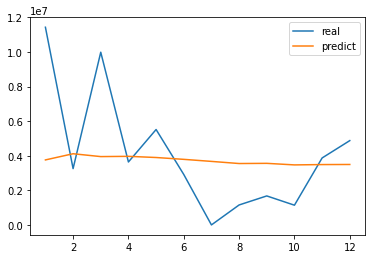

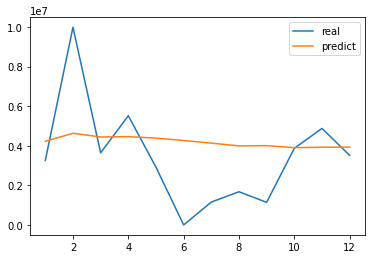

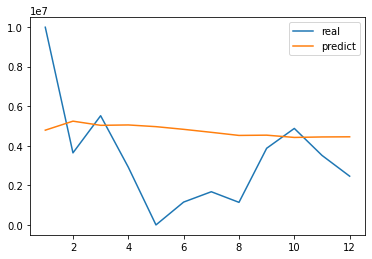

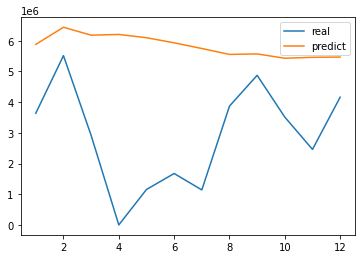

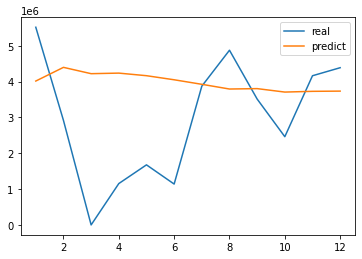

In [ ]:
train_pred = model.predict(train_X)
for i in range(0,26):
  pred1 = np.array(train_pred[i]).flatten()
  plt.plot(range(1,13),train_y[i],label='real')
  plt.plot(range(1,13),pred1,label='predict')
  plt.legend()
  plt.show()

1/1 [==============================] - 0s 23ms/step
[[[7876986.5]
  [7852930. ]
  [8103222.5]
  [8009698.5]
  [7868211. ]
  [7717737. ]
  [7561270. ]
  [7210890. ]
  [7046947. ]
  [6888282. ]
  [7294434. ]
  [7331534.5]]]
['2017-1' '2017-2' '2017-3' '2017-4' '2017-5' '2017-6' '2017-7' '2017-8'
 '2017-9' '2017-10' '2017-11' '2017-12' '2018-1' '2018-2' '2018-3'
 '2018-4' '2018-5' '2018-6' '2018-7' '2018-8' '2018-9' '2018-10' '2018-11'
 '2018-12' '2019-1' '2019-2' '2019-3' '2019-4' '2019-5' '2019-6' '2019-7'
 '2019-8' '2019-9' '2019-10' '2019-11' '2019-12' '2020-1' '2020-2'
 '2020-3' '2020-4' '2020-5' '2020-6' '2020-7' '2020-8' '2020-9' '2020-10'
 '2020-11' '2020-12' '2021-1' '2021-2' '2021-3' '2021-4' '2021-5' '2021-6'
 '2021-7' '2021-8' '2021-9' '2021-10' '2021-11' '2021-12' '2022-1'
 '2022-2' '2022-3' '2022-4' '2022-5' '2022-6' '2022-7']
[ 4381965.61  3024402.13  4275189.62  2650943.38  1079905.66  3765873.17
  2906036.16  4711779.96  4440804.43  5717014.98  6334883.91  2976986.61
  58

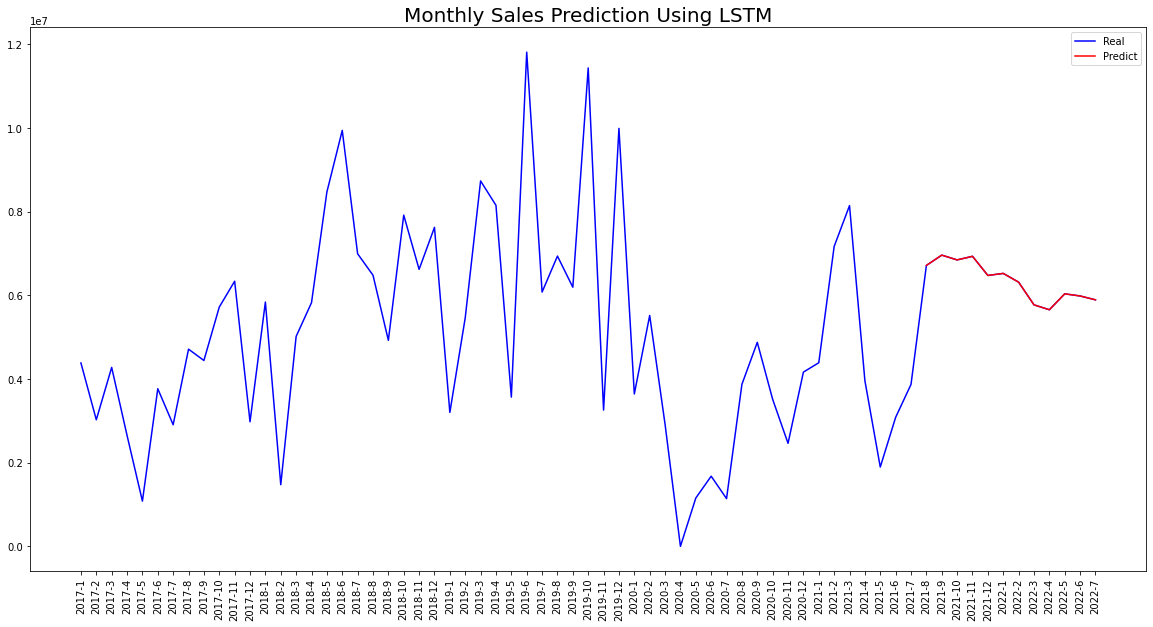

In [ ]:
# Plot the predict value
import matplotlib.pyplot as plt
from datetime import datetime

predict_X = predict_X.reshape((1, 12, 6))
pred_y = model.predict(predict_X,verbose=1)
print(pred_y)

y_future = [6712388.5, 6958646.5, 6844269.5, 6930421.5, 6472997.5, 6521899.0, 6312769.5, 5770669.5, 5653140.5, 6033691.0, 5982449.5, 5890224.5]
x_future = ['2021-8','2021-9','2021-10','2021-11','2021-12','2022-1','2022-2','2022-3','2022-4','2022-5','2022-6','2022-7']

year = [2017,2018,2019,2020,2021]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
x = []
for y in year :
  if y == 2021 :
    month = [1,2,3,4,5,6,7]
  for m in month :
    title = str(y)+'-'+str(m)
    x.append(title)

y = revenue_origin['Net'].tolist()

x = x + x_future
y = y + y_future
y = np.array(y)
x = np.array(x)
print(x)
print(y)

future = 12

threshold = np.ones_like(y,dtype=bool)
threshold[:-future] = False

pred_x = x
pred_y = y

plt.figure(figsize=(20,10))
plt.plot(pred_x, pred_y,color='blue', label='Real')
plt.plot(pred_x[threshold], pred_y[threshold], color='red', label='Predict')
plt.legend()
plt.xticks(rotation =90)
plt.title('Monthly Sales Prediction Using LSTM',fontsize=20)
plt.show()